# Mental Health Model

In [1]:
#import necessary libraries
import os
import sys  
import seaborn as sns 
import heatmap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#pip to install all the libraries here
#!pip install seaborn matplotlib pandas numpy scikit-learn heatmapz

now lets read the data and do preprocessing, the preprocessing will be easy because most of the values are categorical.

In [2]:
#load the dataset
dataset = pd.read_csv('dataset/Dataset-Mental-Disorders.csv')

#print the first few rows of the dataset in a good table format
print(dataset.head())

  Patient Number    Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0     Patiant-01    Usually      Seldom  Sometimes       Sometimes        YES   
1     Patiant-02    Usually      Seldom    Usually       Sometimes         NO   
2     Patiant-03  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3     Patiant-04    Usually      Seldom    Usually      Most-Often        YES   
4     Patiant-05    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO        

In [3]:
dataset = dataset.drop('Patient Number', axis=1)
print(dataset.head())

     Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0    Usually      Seldom  Sometimes       Sometimes        YES   
1    Usually      Seldom    Usually       Sometimes         NO   
2  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3    Usually      Seldom    Usually      Most-Often        YES   
4    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO                YES            YES   
1                  NO               NO                 NO   

In [4]:
#check the dataset for missing values
print(dataset.isnull().sum())

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


In [5]:
#code to drop missing rows
dataset = dataset.dropna()

In [6]:
#code to describe the data
print(dataset.describe())

        Sadness Euphoric  Exhausted Sleep dissorder Mood Swing  \
count       120      120        120             120        120   
unique        4        4          4               4          2   
top     Usually   Seldom  Sometimes       Sometimes         NO   
freq         42       46         38              44         63   

       Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
count                120     120               120             120   
unique                 3       2                 2               2   
top                   NO      NO                NO              NO   
freq                  63      74                73              63   

       Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
count                  120              120                120            120   
unique                   2                2                  2              2   
top                     NO               NO                YES             

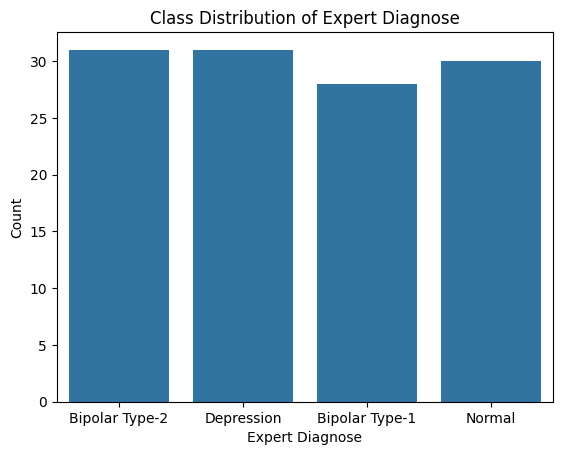

Class balance (%):
Expert Diagnose
Bipolar Type-2    25.833333
Depression        25.833333
Normal            25.000000
Bipolar Type-1    23.333333
Name: proportion, dtype: float64


In [7]:
# Plot the class distribution
sns.countplot(x='Expert Diagnose', data=dataset)
plt.title('Class Distribution of Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

# Print the class balance as percentages
class_counts = dataset['Expert Diagnose'].value_counts(normalize=True) * 100
print("Class balance (%):")
print(class_counts)

In [8]:
cols = ['Sexual Activity', 'Concentration', 'Optimisim']

for col in cols:
    dataset[col] = dataset[col].astype(str).str.extract(r'(\d+)').astype(int)

dataset.to_csv('cleaned_dataset.csv', index=False)

In [9]:
print(dataset.nunique())

Sadness                4
Euphoric               4
Exhausted              4
Sleep dissorder        4
Mood Swing             2
Suicidal thoughts      3
Anorxia                2
Authority Respect      2
Try-Explanation        2
Aggressive Response    2
Ignore & Move-On       2
Nervous Break-down     2
Admit Mistakes         2
Overthinking           2
Sexual Activity        9
Concentration          8
Optimisim              9
Expert Diagnose        4
dtype: int64


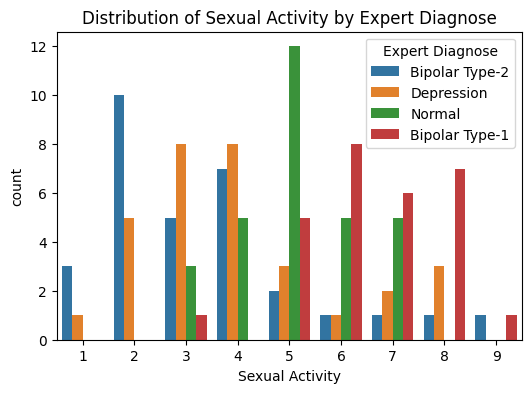

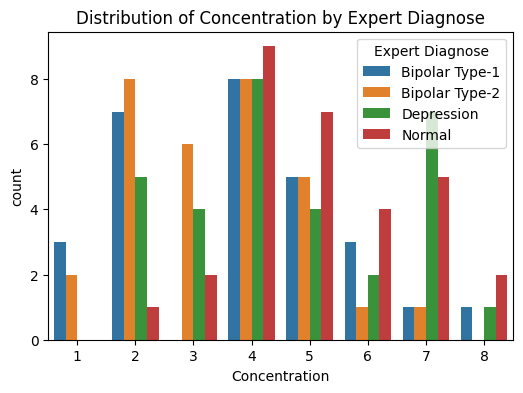

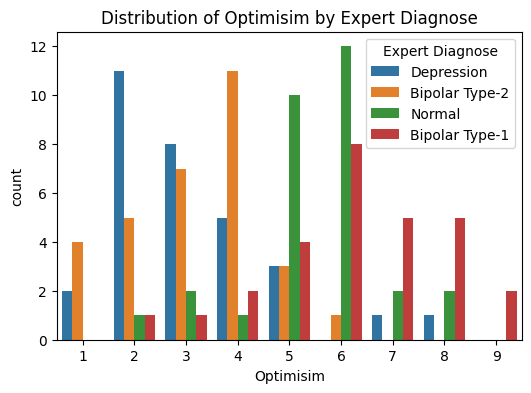

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Sexual Activity', 'Concentration', 'Optimisim']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='Expert Diagnose', data=dataset)
    plt.title(f'Distribution of {feature} by Expert Diagnose')
    plt.show()

In [11]:
print(dataset.head())

     Sadness    Euphoric  Exhausted Sleep dissorder Mood Swing  \
0    Usually      Seldom  Sometimes       Sometimes        YES   
1    Usually      Seldom    Usually       Sometimes         NO   
2  Sometimes  Most-Often  Sometimes       Sometimes        YES   
3    Usually      Seldom    Usually      Most-Often        YES   
4    Usually     Usually  Sometimes       Sometimes         NO   

  Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0              YES       NO                NO             YES   
1               YES      NO                NO              NO   
2                NO      NO                NO             YES   
3               YES     YES                NO             YES   
4                NO      NO                NO              NO   

  Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
0                  NO               NO                YES            YES   
1                  NO               NO                 NO   

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode all other (categorical) columns except the target
categorical_cols = [col for col in dataset.columns if col not in ['Expert Diagnose']]

# Label encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])


# Label encode the target if needed
dataset['Expert Diagnose'] = le.fit_transform(dataset['Expert Diagnose'])

In [15]:
print(dataset.head())


   Sadness  Euphoric  Exhausted  Sleep dissorder  Mood Swing  \
0        3         1          2                2           1   
1        3         1          3                2           0   
2        2         0          2                2           1   
3        3         1          3                0           1   
4        3         3          2                2           0   

   Suicidal thoughts  Anorxia  Authority Respect  Try-Explanation  \
0                  2        0                  0                1   
1                  1        0                  0                0   
2                  0        0                  0                1   
3                  1        1                  0                1   
4                  0        0                  0                0   

   Aggressive Response  Ignore & Move-On  Nervous Break-down  Admit Mistakes  \
0                    0                 0                   1               1   
1                    0                 0

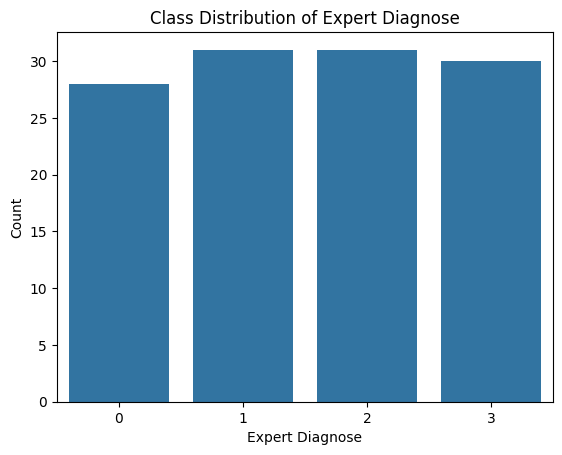

Class balance (%):
Expert Diagnose
1    25.833333
2    25.833333
3    25.000000
0    23.333333
Name: proportion, dtype: float64


In [16]:
# Plot the class distribution
sns.countplot(x='Expert Diagnose', data=dataset)
plt.title('Class Distribution of Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

# Print the class balance as percentages
class_counts = dataset['Expert Diagnose'].value_counts(normalize=True) * 100
print("Class balance (%):")
print(class_counts)

In [17]:
#code to split the data into training and testing and also fix into features and target
# Assuming 'Disorder' is your target column
X = dataset.drop('Expert Diagnose', axis=1)
y = dataset['Expert Diagnose']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts())
print("Resampled training set shape:", y_train_resampled.value_counts())

Original training set shape: Expert Diagnose
1    24
2    22
0    21
3    17
Name: count, dtype: int64
Resampled training set shape: Expert Diagnose
0    24
2    24
3    24
1    24
Name: count, dtype: int64


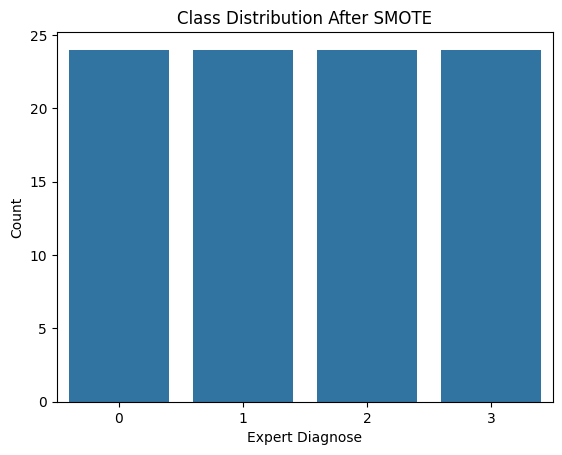

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train_resampled to a pandas Series if it's not already
y_res = pd.Series(y_train_resampled, name='Expert Diagnose')

sns.countplot(x=y_res)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.show()

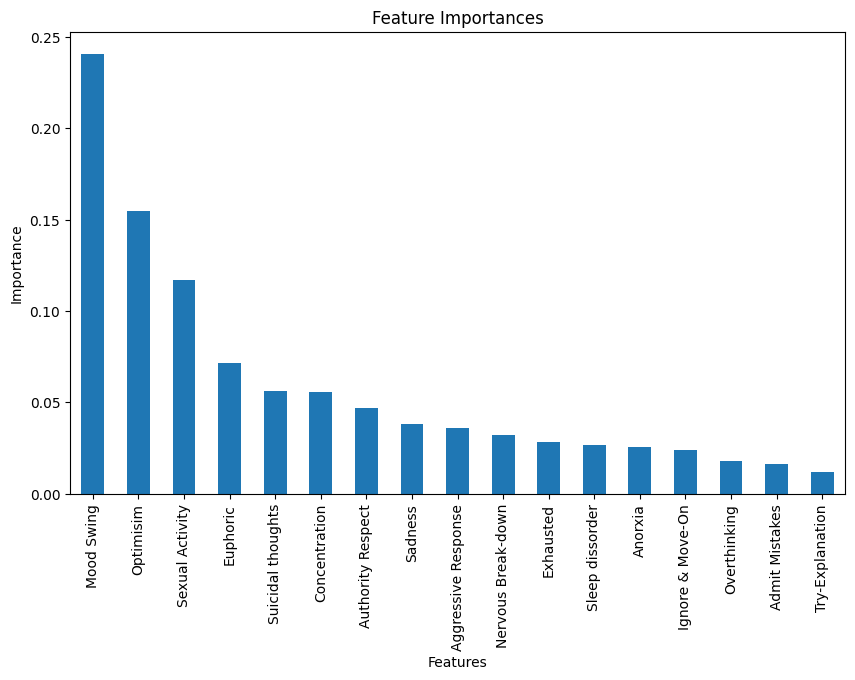

In [20]:
#code to check the feature importance to drop some column or not to.
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit Random Forest to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [ ]:
#code to train the model individualy logistic regression, random forest and decision tree
from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf = rf_grid.best_estimator_

from sklearn.tree import DecisionTreeClassifier

# Decision Tree with hyperparameter tuning
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
dt = dt_grid.best_estimator_

print("Best Decision Tree:", dt)


Best Decision Tree: DecisionTreeClassifier(min_samples_split=10, random_state=42)


In [22]:
#code to evaluate the model using accuracy, recall, precision, and F1 score.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

models = {'Logistic Regression': lr, 'Random Forest': rf, 'Decision Tree': dt}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print()

--- Logistic Regression ---
Accuracy: 0.75
Recall: 0.75
Precision: 0.7686237373737375
F1 Score: 0.7516666666666666

--- Random Forest ---
Accuracy: 0.8055555555555556
Recall: 0.8055555555555556
Precision: 0.8143939393939394
F1 Score: 0.8064814814814815

--- Decision Tree ---
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.7828282828282829
F1 Score: 0.7763888888888889



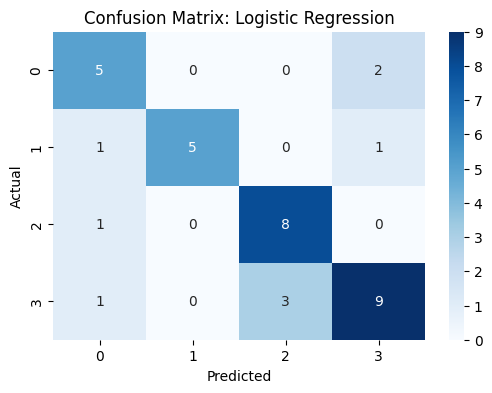

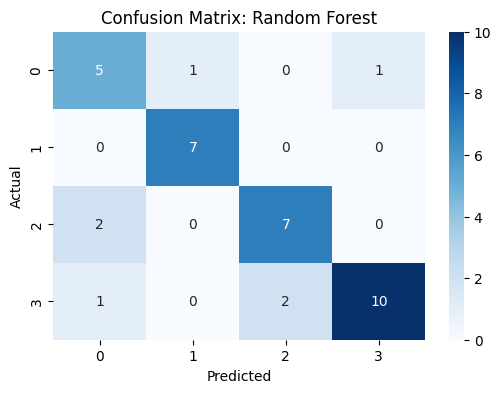

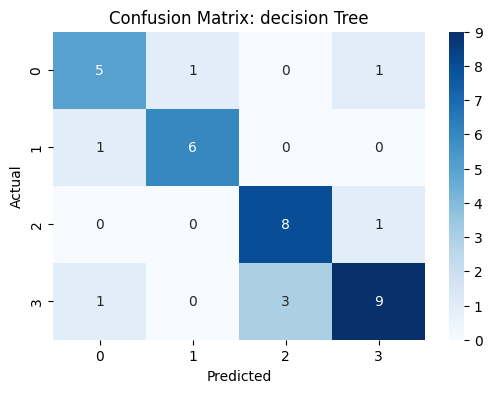

In [23]:
#code for confusion matrix

models = {'Logistic Regression': lr, 'Random Forest': rf, 'decision Tree': dt}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Ensemble Model Accuracy: 0.7777777777777778
Ensemble Model Recall: 0.7777777777777778
Ensemble Model Precision: 0.817929292929293
Ensemble Model F1 Score: 0.7819006346499954


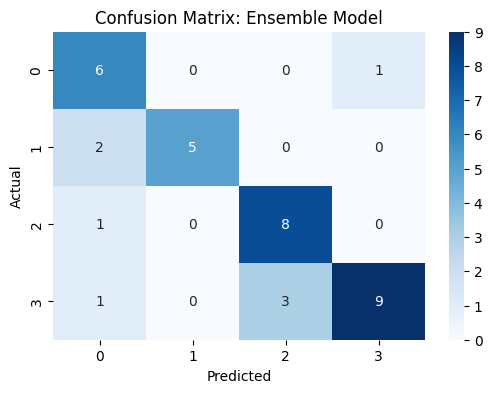

In [24]:

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

from sklearn.ensemble import VotingClassifier

# Create the ensemble model with soft voting
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('dt', dt)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)

# Evaluation of the ensemble with confusion matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_ensemble = ensemble.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Ensemble Model Recall:", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Ensemble Model Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))
print("Ensemble Model F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))

cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ensemble Model Accuracy: 0.8055555555555556
Ensemble Model Recall: 0.8055555555555556
Ensemble Model Precision: 0.8156565656565657
Ensemble Model F1 Score: 0.8064814814814815


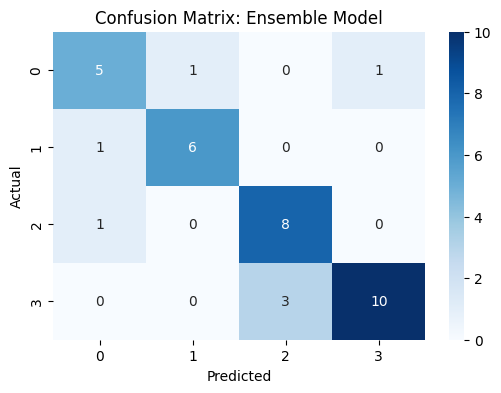

In [25]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model with soft voting
hardensemble = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('dt', dt)
    ],
    voting='hard'
)

hardensemble.fit(X_train, y_train)

# Evaluation of the ensemble with confusion matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_ensemble = hardensemble.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Ensemble Model Recall:", recall_score(y_test, y_pred_ensemble, average='weighted'))
print("Ensemble Model Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))
print("Ensemble Model F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))

cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

                  Model  Accuracy    Recall  Precision  F1 Score
0   Logistic Regression  0.750000  0.750000   0.768624  0.751667
1         Random Forest  0.805556  0.805556   0.814394  0.806481
2         Decision Tree  0.777778  0.777778   0.782828  0.776389
3  Soft Voting Ensemble  0.777778  0.777778   0.817929  0.781901
4  hard Voting Ensemble  0.805556  0.805556   0.815657  0.806481


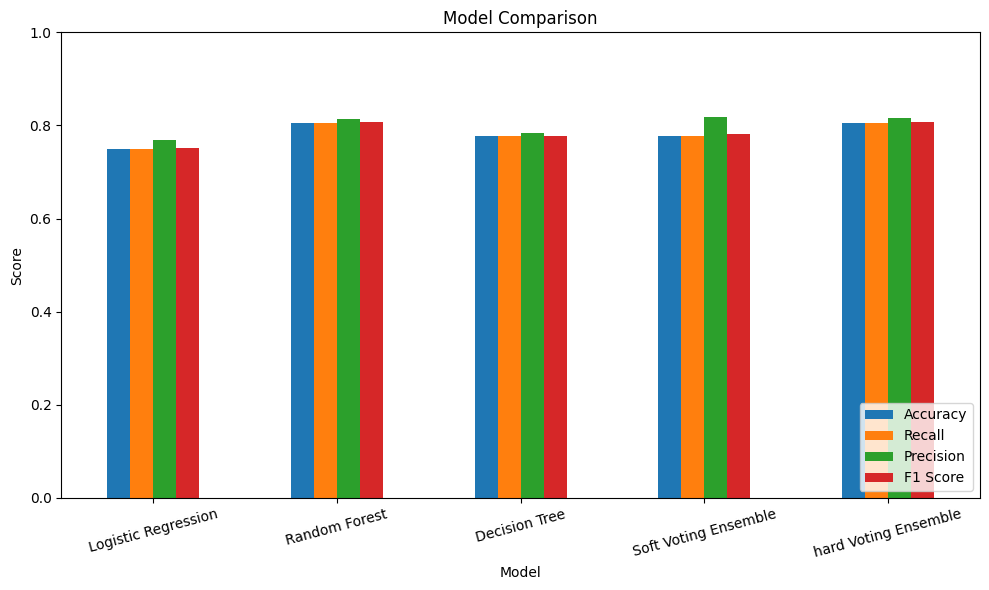

In [26]:
#code to compare the 4 models SVM, RF, LR, and the SFvoting
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Assuming lr, rf, dt, and ensemble (soft voting) are already trained
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Soft Voting Ensemble': ensemble,
    'hard Voting Ensemble': hardensemble
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

#the comparison should be in a chart

# Assuming results_df is the DataFrame with the comparison metrics
results_df.set_index('Model')[['Accuracy', 'Recall', 'Precision', 'F1 Score']].plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [27]:
import pickle

# Save the best model (replace 'ensemble' with your best model variable if different)
with open('best_model.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

# tuning the model